In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드
data = pd.read_csv('/content/AirPassengers.csv', index_col='Month', parse_dates=True)

In [ ]:
# 로그 변환
data_log = np.log(data)

In [ ]:
# 데이터 분할
train_log = data_log[:'1959']
test_log = data_log['1960':]

In [ ]:

# Auto-ARIMA 모델 학습
model_auto = auto_arima(train_log, seasonal=True, m=12)
model_auto_fit = model_auto.fit(train_log)


In [ ]:

# 예측 수행
predictions_log = model_auto_fit.predict(n_periods=len(test_log))
predictions_log = pd.Series(predictions_log, index=test_log.index)


In [ ]:
# 로그 변환 복원
predictions = np.exp(predictions_log)
test = np.exp(test_log)



In [ ]:
# 성능 평가
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 531.7989178867386


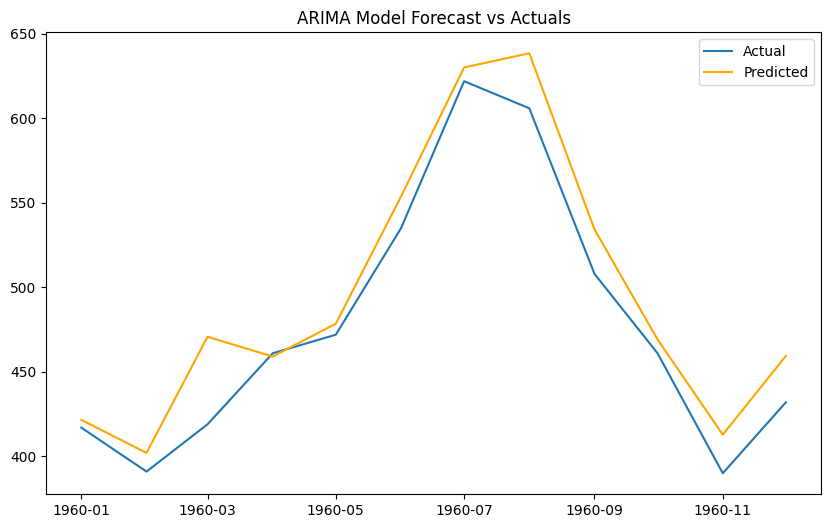

In [ ]:

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend()
plt.show()
